# Lab 5 - Text Mining
- Luis Esturban
- Luis Diego Fernández
- Juan Carlos Menchu

### Librerías

In [2]:
import re
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from pattern.en import sentiment
from nltk.corpus import stopwords

stopwords=set(stopwords.words('english'))

### Datos

In [3]:
#Carga de datos
df = pd.read_csv("GrammarandProductReviews.csv")
train_set = df['reviews.text']
reviews = df['reviews.text']
titles = df['reviews.title']

### Limpieza de datos

In [4]:
#Se pasa todo a minusculas
reviews = reviews.apply(lambda x: x.lower() if type(x) == str else x)
#Se eliminan caracteres especiales
reviews = reviews.apply(lambda x: re.sub('[^a-zA-Z0-9 ]+','', x) if type(x) == str else x)
#Se eliminan URL
reviews = reviews.apply(lambda x: re.sub('\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*','',x) if type(x) == str else x)

In [5]:
#Se pasa todo a minusculas
titles = titles.apply(lambda x: x.lower() if type(x) == str else x)
#Se eliminan caracteres especiales
titles = titles.apply(lambda x: re.sub('[^a-zA-Z0-9 ]+','', x) if type(x) == str else x)
#Se eliminan URL
titles = titles.apply(lambda x: re.sub('\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*','',x) if type(x) == str else x)

### Exploracion

In [6]:
#Se realiza un conteo de la cantidad de palabras
frec = Counter()
for i in reviews:
    frec.update(w for w in str(i).split())
frec

Counter({'i': 108934,
         'love': 16899,
         'this': 67149,
         'album': 215,
         'its': 9366,
         'very': 11924,
         'good': 12201,
         'more': 6448,
         'to': 61987,
         'the': 116964,
         'hip': 7,
         'hop': 4,
         'side': 438,
         'than': 4375,
         'her': 1173,
         'current': 111,
         'pop': 321,
         'sound': 776,
         'so': 16061,
         'hype': 59,
         'listen': 129,
         'everyday': 769,
         'at': 7825,
         'gym': 85,
         'give': 1279,
         'it': 68360,
         '5star': 11,
         'rating': 122,
         'all': 11924,
         'way': 3172,
         'metaphors': 1,
         'are': 13209,
         'just': 8423,
         'crazy': 234,
         'flavor': 367,
         'review': 18907,
         'was': 40648,
         'collected': 17726,
         'as': 32830,
         'part': 18666,
         'of': 52300,
         'a': 77978,
         'promotion': 17734,
         '

In [7]:
#Se eliminan las stopwords
for i in stopwords:
    del frec[i]
frec

Counter({'love': 16899,
         'album': 215,
         'good': 12201,
         'hip': 7,
         'hop': 4,
         'side': 438,
         'current': 111,
         'pop': 321,
         'sound': 776,
         'hype': 59,
         'listen': 129,
         'everyday': 769,
         'gym': 85,
         'give': 1279,
         '5star': 11,
         'rating': 122,
         'way': 3172,
         'metaphors': 1,
         'crazy': 234,
         'flavor': 367,
         'review': 18907,
         'collected': 17726,
         'part': 18666,
         'promotion': 17734,
         'read': 384,
         'reviews': 611,
         'looking': 2142,
         'buying': 1166,
         'one': 10169,
         'couples': 10,
         'lubricants': 1,
         'ultimately': 24,
         'disappointed': 1202,
         'didnt': 2934,
         'even': 4311,
         'live': 785,
         'starters': 11,
         'neither': 53,
         'boyfriend': 76,
         'could': 2477,
         'notice': 741,
         'sort': 

In [8]:
#Se presentan las 5 palabras mas comunes
frec.most_common(5)

[('great', 20946),
 ('product', 20267),
 ('movie', 19734),
 ('review', 18907),
 ('part', 18666)]

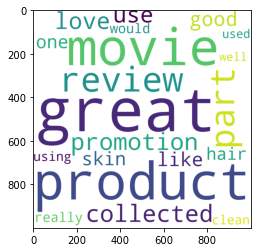

In [9]:
#Se crea la nube de palabras
nube = WordCloud(background_color="white",width=1000,height=1000, max_words=20,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(frec)
plt.imshow(nube)

In [10]:
#Se verifica el sentiminiento de las palabras individuales
PalabrasUnicas=[]
for key in frec:
    PalabrasUnicas.append(key)

In [11]:
#Se verifica el sentimineto de las palabras
Buena=0
Neutra=0
Mala=0
for i in range(len(PalabrasUnicas)):
    temporal=sentiment(PalabrasUnicas[i])
    if temporal[0] > 0:
        Buena+=1
    elif temporal[0]==0:
        Neutra+=1
    elif temporal[0] < 0:
        Mala+=1
print("Palabras Buenas: "+str(Buena))
print("Palabras Neutras: "+str(Neutra))
print("Palabras Malas: "+str(Mala))

Palabras Buenas: 597
Palabras Neutras: 34420
Palabras Malas: 535


### N-grams

Funciones para calculos de bigramas y trigramas:

In [12]:
def calc_2gram(data):
    
    n_gram = []
    
    for tmp_data in data:
        tmp_data = str(tmp_data)
        last = ""
        for wn in tmp_data.split():
            if last == "":
                last = wn
                continue
                
            n_gram.append((last, wn))
            last = wn

    return n_gram

def calc_3gram(data):
    
    n_gram = []
    
    for tmp_data in data:
        tmp_data = str(tmp_data)
        last = ""
        p_last = ""
        for wn in tmp_data.split():
            if p_last == "":
                p_last = wn
                continue
            elif last == "":
                last = p_last
                p_last = wn
                continue
                
            n_gram.append((last, p_last, wn))
            last = p_last
            p_last = wn

    return n_gram

In [13]:
n2_gram = calc_2gram(reviews)
n3_gram = calc_3gram(reviews)

Bigramas:

In [14]:
n2_gram

[('i', 'love'),
 ('love', 'this'),
 ('this', 'album'),
 ('album', 'its'),
 ('its', 'very'),
 ('very', 'good'),
 ('good', 'more'),
 ('more', 'to'),
 ('to', 'the'),
 ('the', 'hip'),
 ('hip', 'hop'),
 ('hop', 'side'),
 ('side', 'than'),
 ('than', 'her'),
 ('her', 'current'),
 ('current', 'pop'),
 ('pop', 'sound'),
 ('sound', 'so'),
 ('so', 'hype'),
 ('hype', 'i'),
 ('i', 'listen'),
 ('listen', 'to'),
 ('to', 'this'),
 ('this', 'everyday'),
 ('everyday', 'at'),
 ('at', 'the'),
 ('the', 'gym'),
 ('gym', 'i'),
 ('i', 'give'),
 ('give', 'it'),
 ('it', '5star'),
 ('5star', 'rating'),
 ('rating', 'all'),
 ('all', 'the'),
 ('the', 'way'),
 ('way', 'her'),
 ('her', 'metaphors'),
 ('metaphors', 'are'),
 ('are', 'just'),
 ('just', 'crazy'),
 ('good', 'flavor'),
 ('flavor', 'this'),
 ('this', 'review'),
 ('review', 'was'),
 ('was', 'collected'),
 ('collected', 'as'),
 ('as', 'part'),
 ('part', 'of'),
 ('of', 'a'),
 ('a', 'promotion'),
 ('good', 'flavor'),
 ('i', 'read'),
 ('read', 'through'),
 ('thr

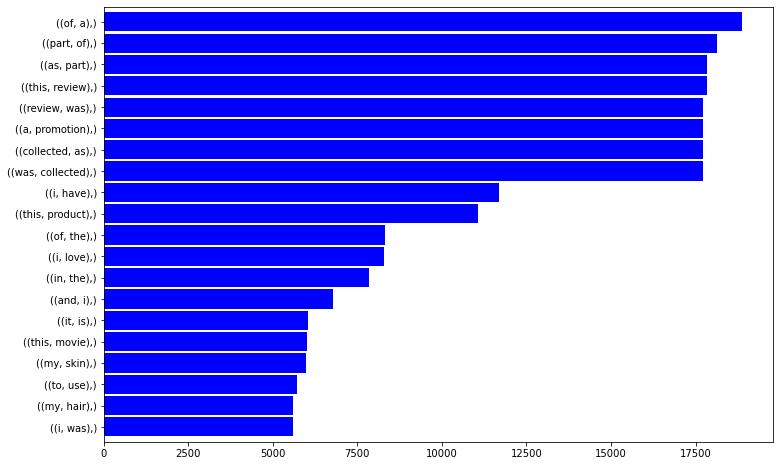

In [15]:
cantidad2 = nltk.FreqDist(n2_gram)
bigrama = (pd.Series(nltk.ngrams(n2_gram, 0)).value_counts())[:20]
bigrama.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

Trigramas:

In [16]:
n3_gram

[('i', 'love', 'this'),
 ('love', 'this', 'album'),
 ('this', 'album', 'its'),
 ('album', 'its', 'very'),
 ('its', 'very', 'good'),
 ('very', 'good', 'more'),
 ('good', 'more', 'to'),
 ('more', 'to', 'the'),
 ('to', 'the', 'hip'),
 ('the', 'hip', 'hop'),
 ('hip', 'hop', 'side'),
 ('hop', 'side', 'than'),
 ('side', 'than', 'her'),
 ('than', 'her', 'current'),
 ('her', 'current', 'pop'),
 ('current', 'pop', 'sound'),
 ('pop', 'sound', 'so'),
 ('sound', 'so', 'hype'),
 ('so', 'hype', 'i'),
 ('hype', 'i', 'listen'),
 ('i', 'listen', 'to'),
 ('listen', 'to', 'this'),
 ('to', 'this', 'everyday'),
 ('this', 'everyday', 'at'),
 ('everyday', 'at', 'the'),
 ('at', 'the', 'gym'),
 ('the', 'gym', 'i'),
 ('gym', 'i', 'give'),
 ('i', 'give', 'it'),
 ('give', 'it', '5star'),
 ('it', '5star', 'rating'),
 ('5star', 'rating', 'all'),
 ('rating', 'all', 'the'),
 ('all', 'the', 'way'),
 ('the', 'way', 'her'),
 ('way', 'her', 'metaphors'),
 ('her', 'metaphors', 'are'),
 ('metaphors', 'are', 'just'),
 ('are

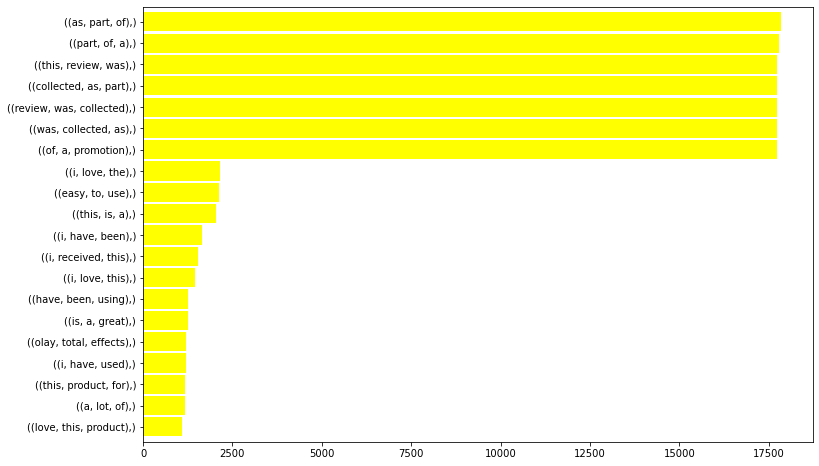

In [17]:
cantidad3 = nltk.FreqDist(n3_gram)
trigrama = (pd.Series(nltk.ngrams(n3_gram, 0)).value_counts())[:20]
trigrama.sort_values().plot.barh(color='yellow', width=.9, figsize=(12, 8))

### Algoritmo para calificación del review

#### Explicación:

- La calificacion del review va de 0 a 10.
- Si no hay palabras con sentimiento la calificacion es de 5.
- Segun el porcentage derivado de sentimiento total dividido de palabras totales con sentimientos, se encuentra un factor con rango de -1 a 1, esto es multiplicado por 2.5 y sumado a una nota nuetra.
- Finalmente se hace el mismo paso anterior pero ahora con el titulo.

#### Formula:
- Calificación = 5 + factor_de_sentimiento_review * 0.25 + factor_de_sentimiento_titulo * 0.25

Calculo de calificaciones:

In [18]:
calificaciones = []

for index, review in enumerate(reviews):
    review = str(review).split()
    title = str(titles[index]).split()
    lenght_r = len(review)
    lenght_t = len(title)
    
    # review calification (5 for neutral)
    tmp_cal = 5
    
    # Loop for analysing review
    tmp_cal_r = 0
    for w in review:
        c = sentiment(w)[0]
        
        # sumar sentimiento, si es neutro no contarlo
        if c == 0:
            lenght_r -= 1
        else:
            tmp_cal_r += c
    
    # Loop for analysing title
    tmp_cal_t = 0
    for w in title:
        c = sentiment(w)[0]
        
        # sumar sentimiento, si es neutro no contarlo
        if c == 0:
            lenght_t -= 1
        else:
            tmp_cal_t += c
    
    # Add review cal
    if tmp_cal_r != 0:
        tmp_cal += tmp_cal_r/lenght_r * 2.5 # Nota entre 0 y 2.5
    
    # Add title cal
    if tmp_cal_t != 0:
        tmp_cal += tmp_cal_t/lenght_t * 2.5 # Nota entre 0 y 2.5
        
    calificaciones.append(tmp_cal)

Dataset con calificaciones incluidas:

In [19]:
df_calificacion = df.copy()
df_calificacion["cali_review"] = calificaciones
df_calificacion = df_calificacion[["id","brand","categories","name","reviews.text","reviews.title","reviews.username","cali_review"]]

In [20]:
df_calificacion

,id,brand,categories,name,reviews.text,reviews.title,reviews.username,cali_review
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the...,Just Awesome,Joshua,8.035714
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part...,Good,Dorothy W,8.500000
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor.,Good,Dorothy W,8.500000
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,I read through the reviews on here before look...,Disappointed,Rebecca,3.188005
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,My husband bought this gel for us. The gel cau...,Irritation,Walker557,5.000000
...,...,...,...,...,...,...,...,...
71039,AVzRGDlw-jtxr-f3yfFH,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free Puremoist Disinfecting Solution 10fl Oz,I'm dealing with dry eyes and very sensitive t...,Solves the problem,Seniorgal,4.989583
71040,AVzRGDlw-jtxr-f3yfFH,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free Puremoist Disinfecting Solution 10fl Oz,Great stuff! Helps keep my contacts moist all ...,Great stuff!,Nammaw,9.000000
71041,AVzRGDlw-jtxr-f3yfFH,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free Puremoist Disinfecting Solution 10fl Oz,Right price,My review,LDBoston,5.714286
71042,AVzvTLfivKc47QAVfPme,Bebe Au Lait,"Baby,Nursing & Feeding,Breastfeeding,Nursing C...",Bebe Au Lait174 Premium Muslin Nursing Scarf -...,I was so pleased when this scarf arrived for m...,Wonderful Product,Vanessag,8.363095


Cuáles son los 10 productos de mejor calidad dado su review.

In [35]:
df_calificacion[["id","name","cali_review"]].groupby(["id","name"])\
.mean().sort_values(by=["cali_review"],ascending=False)[:10]

,,cali_review
id,name,
AVpfsQoeilAPnD_xgfx5,Walkers Stem Ginger Shortbread,10.000000
AVpflENxilAPnD_xeXFF,Noosa Honey Yogurt,8.916667
AVphWFBl1cnluZ0-BWHV,TRS7301B Trumpet Stand,8.875000
AVpiD0WyilAPnD_xASfb,Ge Led 60watt Outdoor Post Light Bulb - Soft White,8.850000
AVpiQDRBilAPnD_xCVUP,Season Seafood Sardine Fillets In Sweet & Tangy Sauce,8.812500
AVphW8d8LJeJML43Z8o8,Reynolds174 Bakeware Pans Non-Stick With Lids - 3ct,8.791667
AVpgPhytilAPnD_xpmxw,Third Man On The Mountain (dvd),8.766667
AVphuurM1cnluZ0-FwHp,Bosch 3912/B3915/3915 Miter Saw Replacement Dust Bag # 2610911939,8.750000
AV2Avn5dGV-KLJ3alTjq,La Tortilla Factory Hand Made Style Tortillas Flour,8.750000


Cuáles son los 10 productos de menor calidad dado su review.

In [34]:
df_calificacion[["id","name","cali_review"]].groupby(["id","name"])\
.mean().sort_values(by=["cali_review"],ascending=True)[:10]

,,cali_review
id,name,
AVpe-YAL1cnluZ0-bHGh,Udi's Pepperoni Pizza,3.200000
AVpfXAlALJeJML437zbd,Gone Fishing Titanized Fisherman Pliers with Braid Cutter,3.291667
AVphNNxzLJeJML43YGWT,Horizon174 Organic Unsalted Butter - 1lbs,3.708333
AVpiLKKA1cnluZ0-Kpkm,Imagine Foods Organic Low Sodium Free Range Chicken Broth,4.125000
AVpfbjraLJeJML439F91,Pocket Watch Wall Clock Distressed Black - Yosemite Home Decor174,4.319444
AVpiwT88LJeJML43oxm0,Nordic Ware 3D Pumpkin Duet Pan,4.437500
AVphufZKLJeJML43eIk_,Peak Long Life Antifreeze Coolant 1-Gal.,4.464286
AVpfYs7ULJeJML438TvU,One Grace Place Terrific Tie Dye Throw Pillow Car (13x9x3),4.475000
AVphCi-TLJeJML43V9m9,"Black Opal Total Coverage Spot & Scar Eraser, Hazelnut",4.625000


Cuáles son los usuarios que dan la mayor cantidad de reviews a distintos productos.

In [66]:
df_calificacion[["reviews.username","cali_review"]].groupby("reviews.username")["reviews.username"]\
.count().sort_values(ascending=False)[2:12]

reviews.username
Mike                 105
Chris                 88
ByAmazon Customer     58
Dave                  57
John                  49
Rick                  41
James                 32
Robert                31
Sandy                 30
Lisa                  29
Name: reviews.username, dtype: int64

Cuálesson los usuarios que más reviews negativos y positivos dan en promedio.

In [65]:
# Positivos
df_calificacion[["reviews.username","cali_review"]].where(df_calificacion["cali_review"] > 5).groupby("reviews.username")["reviews.username"]\
.count().sort_values(ascending=False)[2:12]

reviews.username
Mike                 98
Chris                84
Dave                 51
John                 45
ByAmazon Customer    41
Rick                 38
Robert               31
James                31
Lisa                 27
Tony                 26
Name: reviews.username, dtype: int64

In [60]:
# Negativos
df_calificacion[["reviews.username","cali_review"]].where(df_calificacion["cali_review"] < 5).groupby("reviews.username")["reviews.username"]\
.count().sort_values(ascending=False)[2:12]

reviews.username
Mike            6
Dave            5
Mimi            4
Anonymous       3
Lind            3
Disappointed    3
Steve           3
Keith           3
aj1135          3
Kimberly        3
Name: reviews.username, dtype: int64

Cuáles son los productores que tienen productos de mejor calidad.

In [63]:
df_calificacion[["brand","cali_review"]].groupby("brand")\
.mean().sort_values(by=["cali_review"],ascending=False)[:10]

,cali_review
brand,
Walkers,10.000000
Noosa,8.916667
Season Seafood,8.812500
Reynolds,8.791667
Bosch,8.750000
La Tortilla Factory,8.750000
Jack Link's,8.660714
Fan Mats,8.500000
Body Fantasies,8.437500


Cuáles son los productores que tienen productos de peor calidad

In [64]:
df_calificacion[["brand","cali_review"]].groupby("brand")\
.mean().sort_values(by=["cali_review"],ascending=True)[:10]

,cali_review
brand,
Udi's,3.200000
Gone Fishing,3.291667
Horizon,3.708333
Imagine Foods,4.125000
Yosemite Home Decor,4.319444
Nordicware,4.437500
Peak,4.464286
Black Opal,4.625000
Stonyfield,4.638889
